In [1]:
import numpy as np
from constants import *
from functions import g, F, peak_freq, gT
from ef import solve_ecc, k
from scipy import integrate
from numpy import log10 as lg
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tqdm import tqdm
from scipy import interpolate
from compute_hc import dEdfrQf

In [2]:
Mc0=4.16*1e+8*MS
q=1
fi=1e-9
ff=10**(-7)
f0=1e-9
n_har=200
n_pts=50

eta=q/(1+q)**2
z0=0.3
kcutoff=1/4

In [3]:
farr=np.logspace(lg(fi),lg(ff),100)

In [4]:
earr=np.array([0.3,0.6,0.9])

In [5]:
newtonian=[[],[],[]]
for i in range(len(earr)):
    newtonian[i].append(dEdfrQf(farr,Mc0,eta,n_pts,fi,ff,f0,earr[i],z0))

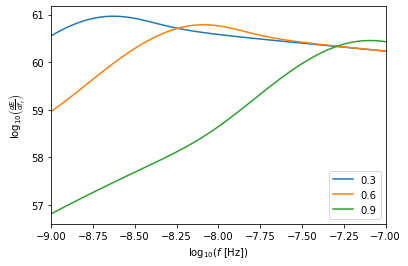

In [6]:
for i in range(len(earr)):
    plt.plot(lg(farr),lg(newtonian[i][0]),label=str(earr[i]))
plt.legend()
plt.xlim([lg(fi),lg(ff)])
plt.ylabel(r'$\log_{10}\left(\frac{dE}{df_r}\right)$')
plt.xlabel(r'$\log_{10}(f $ [Hz])')
plt.show()

In [7]:
ORIGINAL=4*G/(np.pi*c**2*farr)*newtonian[len(earr)-1][0]

In [8]:
np.savetxt('original.csv',np.stack((lg(farr),lg(ORIGINAL)), axis=-1))
# x1,x2=np.genfromtxt('random.txt').transpose()

In [9]:
# original=newtonian[len(earr)-1][0]
# Farr=np.logspace(-12,-4,200)
# fit = interpolate.interp1d(Farr, dEdfrQf(Farr,Mc0,eta,n_har,n_pts,1e-12,1e-4,f0,0.9,z0),fill_value='extrapolate')

In [10]:
# def get_shift(fi,Mc0,e0,z0,Mc,z,e):
#     fp0=peak_freq(fi,e0)
#     fpt=peak_freq(fi,e)
#     original=fit(farr)
#     shift=(fit(farr*fp0/fpt)*(fpt/fp0)**(-1/3)*(Mc/Mc0)**(5/3)*((1+z)/(1+z0))**(-1/3))
#     return original, shift  

In [17]:
def get_shift(fi,Mc0,e0,z0,Mc,z,e):
    fp0=peak_freq(fi,e0)
    fpt=peak_freq(fi,e)
    original=dEdfrQf(farr,Mc,eta,n_pts,fi,ff,f0,e,z)
    shift=(dEdfrQf(farr*fp0/fpt,Mc0,eta,n_pts,fi,ff,f0,e0,z0)
           *(fpt/fp0)**(-1/3)*(Mc/Mc0)**(5/3)*((1+z)/(1+z0))**(-1/3))
    return original, shift    

In [18]:
Mc=1e6*MS;z=4

In [19]:
# original, shift=get_shift(fi,Mc0,0.9,z0,Mc0,z0,0.5)
original, shift=get_shift(fi,Mc0,0.9,z0,Mc,z,0.5)

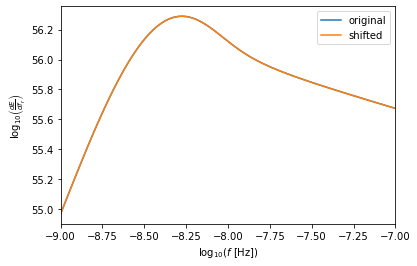

In [20]:
plt.plot(lg(farr),lg(original),label='original')
plt.plot(lg(farr),lg(shift),label='shifted')
plt.legend()
plt.xlim([lg(fi),lg(ff)])
plt.ylabel(r'$\log_{10}\left(\frac{dE}{df_r}\right)$')
plt.xlabel(r'$\log_{10}(f $ [Hz])')
plt.show()

In [21]:
Mc1=1e6*MS;Mc2=1e10*MS
Mstar=1e8*MS
zstar=2
z1=0.02
z2=5

In [22]:
dn0=1e-4*Mpc**(-3)/Gyr
H0=70*1e3/(Mpc)

In [23]:
def comoving_density_AN(Mc,z):
    dzdt=(1+z)*np.sqrt(0.3*(1+z)**3+0.7)
    w=((1+z)**2*np.exp(-Mc/Mstar)*np.exp(-z/zstar))/dzdt
    allf=w/Mc*dn0/H0
    return allf

In [24]:
def nz(z):
    dzdt=(1+z)*np.sqrt(0.3*(1+z)**3+0.7)
    w1=((1+z)**2*np.exp(-z/zstar))/dzdt*((1+z)/(1+z0))**(-1/3)
    return w1

In [25]:
def nm(Mc):
    w2=np.exp(-Mc/Mstar)/Mc*(Mc/Mc0)**(5/3)
    return w2        

In [26]:
Iz=integrate.quad(nz,z1,z2)
Iz

(1.5988361920316077, 7.83478619005697e-13)

In [27]:
Im=integrate.quad(nm,Mc1,  Mc2)
Im

(0.08387061928024044, 1.044450936020373e-09)

In [28]:
hc2arr=ORIGINAL*Iz[0]*Im[0]*dn0/H0

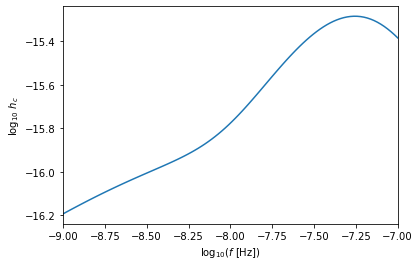

In [29]:
plt.plot(lg(farr),lg(hc2arr)/2)
plt.xlim([lg(fi),lg(ff)])
plt.ylabel(r'$\log_{10} \ h_c$')
plt.xlabel(r'$\log_{10}(f $ [Hz])')
plt.show()

In [30]:
pwd

'/media/subhajit/subhajit2/Research/eGWB/recent/runQ'

In [31]:
np.savetxt('scaleQ.csv',np.stack((lg(farr),lg(hc2arr)/2), axis=-1))